In [1]:
import networkx as nx
import numpy as np

## Generate the data

In [24]:
from tqdm import tqdm

data_path = {4:None, 8:None, 10:None}
data_cluster = {4:None, 8:None, 10:None}
for k in [4, 8, 10]:
    # for each k create graphs with different b
    paths = []
    clust = []
    for beta in tqdm(np.geomspace(0.0001, 1, num=14)):
        # iterate b in geomspace and get shortest path and
        # average clustering coefficient
        G = nx.watts_strogatz_graph(1000, k, beta)
        paths.append(nx.average_shortest_path_length(G))
        clust.append(nx.average_clustering(G))
    data_path[k] = np.array(paths)
    data_cluster[k] = np.array(clust)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:59<00:00,  4.28s/it]


## Plot the data

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

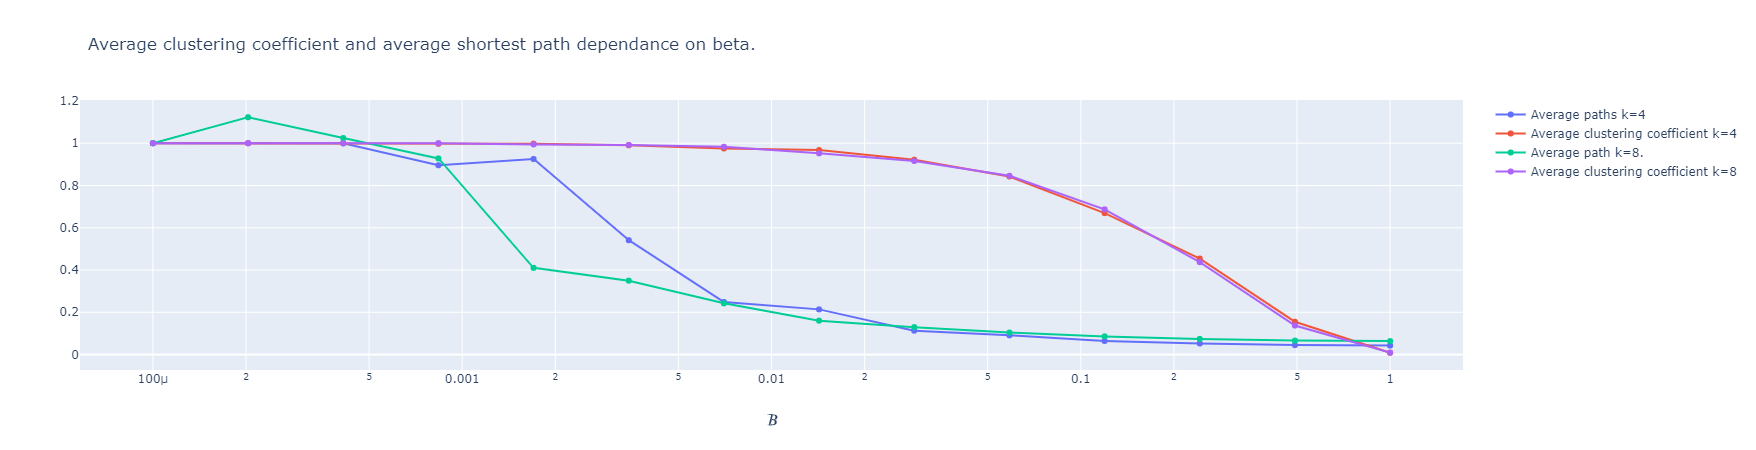

In [30]:
trace1 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_path[4]/data_path[4][0],
    mode="lines+markers",
    name="Average paths k=4"
)
trace2 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_cluster[4]/data_cluster[4][0],
    mode="lines+markers",
    name="Average clustering coefficient k=4"
)
trace3 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_path[8]/data_path[8][0],
    mode="lines+markers",
    name="Average path k=8."
)
trace4 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_cluster[8]/data_cluster[8][0],
    mode="lines+markers",
    name="Average clustering coefficient k=8"
)
trace5 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_path[10]/data_path[10][0],
    mode="lines+markers",
    name="Average path k=8."
)
trace6 = go.Scatter(
    x=np.geomspace(0.0001, 1, num=14),
    y=data_cluster[10]/data_cluster[10][0],
    mode="lines+markers",
    name="Average clustering coefficient k=8"
)
fig = go.Figure(
    data=[trace1, trace2, trace3, trace4],
    layout=go.Layout(
        title="Average clustering coefficient and average shortest path dependance on beta.",
        xaxis_type="log"
    )
)
fig.update_xaxes(title_text="$B$")
fig.show()

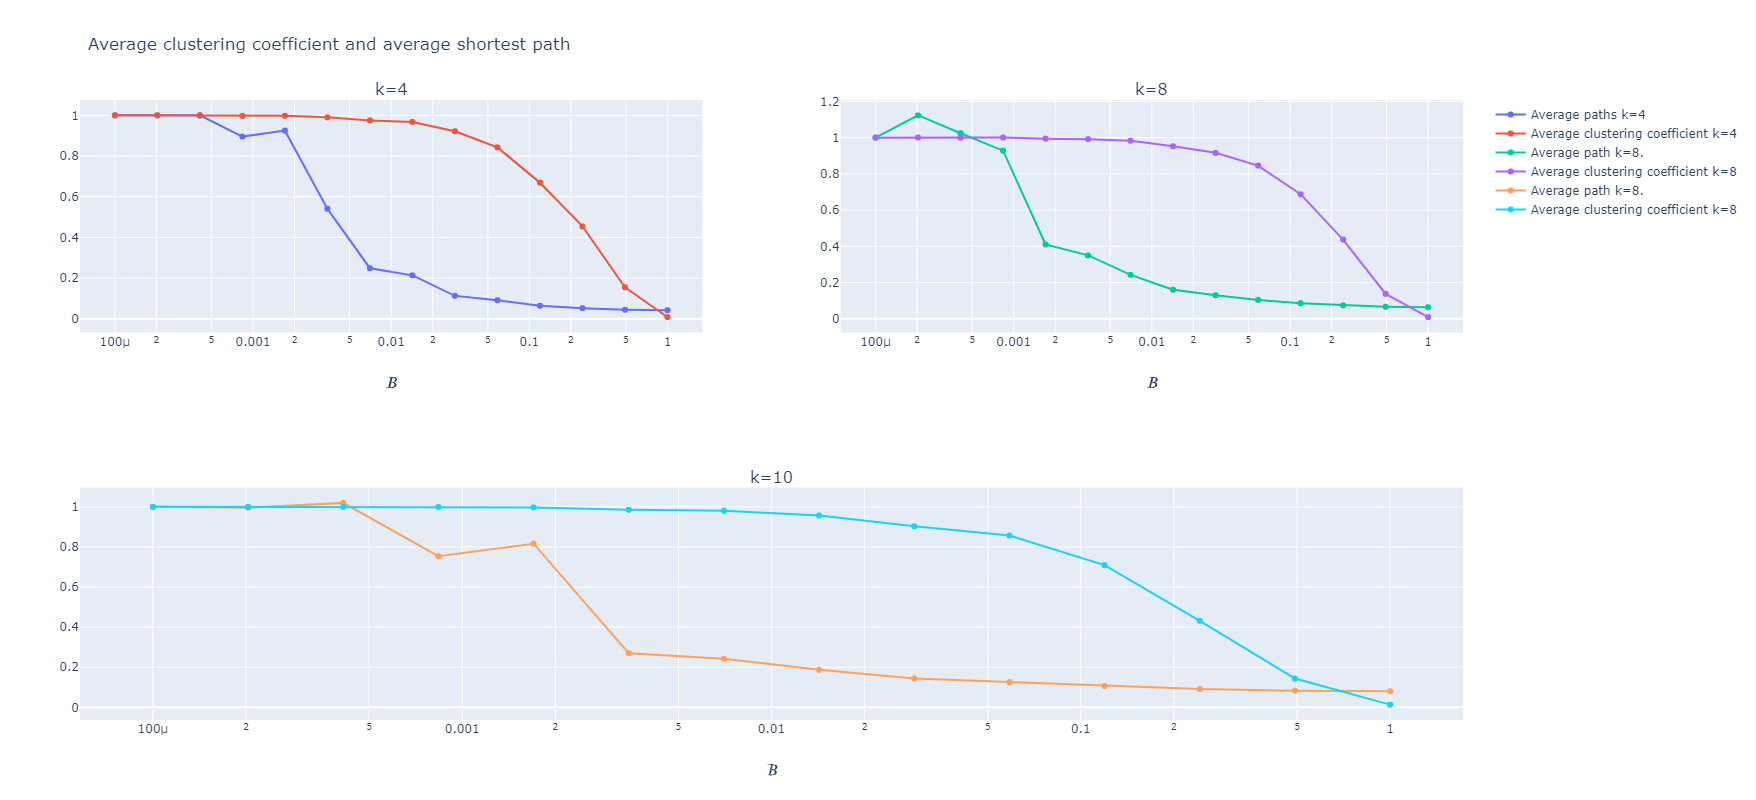

In [31]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("k=4","k=8", "k=10")

)

fig.add_trace(
    trace1,
    row=1, col=1
)
fig.add_trace(
    trace2,
    row=1, col=1
)
fig.add_trace(
    trace3,
    row=1, col=2
)
fig.add_trace(
    trace4,
    row=1, col=2
)
fig.add_trace(
    trace5,
    row=2, col=1
)
fig.add_trace(
    trace6,
    row=2, col=1
)
fig.update_xaxes(type="log", title_text="$B$")
fig.update_xaxes(type="log", title_text="$B$")
fig.update_xaxes(type="log", title_text="$B$")
fig.update_layout(title_text="Average clustering coefficient and average shortest path", height=800, width=1000)
fig.show()

## Diameter and the average path length

In [8]:
diameter = []
average_diam = []
rang = list(map(int, np.logspace(1,3)))
for N in tqdm(rang):
    G = nx.watts_strogatz_graph(N, 4, beta)
    d_max = nx.diameter(G)
    d_avg = nx.average_shortest_path_length(G)
    diameter.append(d_max)
    average_diam.append(d_avg)


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:38<00:00,  1.30it/s]


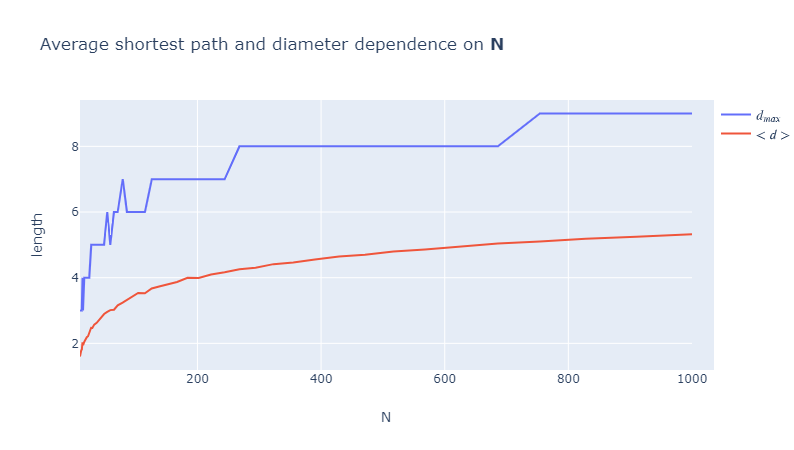

In [21]:
trace1 = go.Scatter(
    x=rang,
    y=diameter,
    name="$d_{max}$"
)
trace2 = go.Scatter(
    x=rang,
    y=average_diam,
    name="$< d >$"
)
fig = go.Figure(
    data=[trace1, trace2]
)
fig.update_layout(title="Average shortest path and diameter dependence on <b>N</b>")
fig.update_xaxes(title_text="N")
fig.update_yaxes(title_text="length")
fig.show()

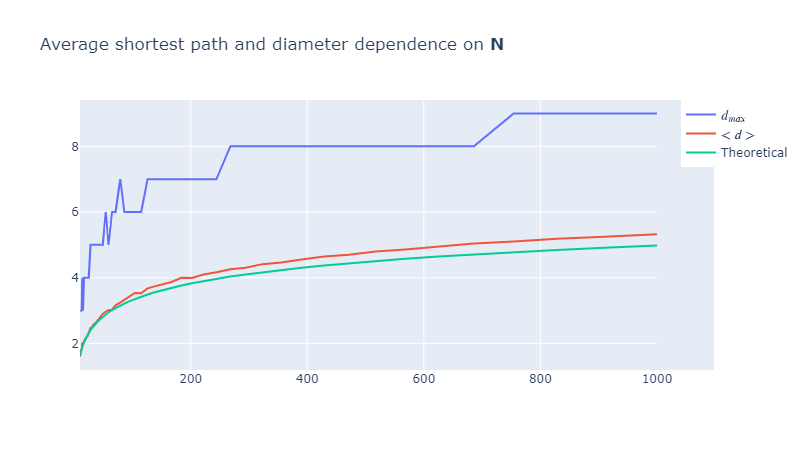

In [17]:
def theor_d_max(x, k):
    return np.log(x) / np.log(k)

theor1 = go.Scatter(
    x=rang,
    y=list(map(lambda x: theor_d_max(x, 4), rang)),
    name="Theoretical"
)
fig.add_trace(theor1)
fig.show()